## Duetsch Algo

### Quantum Parallelism

In [19]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.primitives import BackendSamplerV2

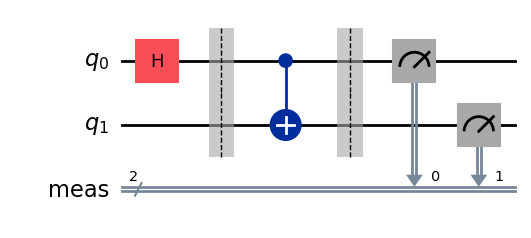

In [20]:
#Step 1: Map

qc = QuantumCircuit(2)

def two_bit_function(case: int):
    if case not in [1,2,3,4]:
        raise ValueError("`case` must be in 1,2,3,4")
    
    f = QuantumCircuit(2)
    if case in [2,3]:
        f.cx(0,1)
    if case in [3,4]:
        f.x(1)
    return f

qc.h(0)
qc.barrier()
qc.compose(two_bit_function(2), inplace=True)  #compose() is how we plug the oracle into the main algorithm. Insert one quantum circuit inside another quantum circuit, gate-by-gate, preserving qubit order.
qc.measure_all()

qc.draw("mpl")

##### If we want to run on real hardware then 
##### Step 2: Transpile
##### from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
##### target = backend.target
##### pm = generate_preset_pass_manager(target=target, optimization_level=3)
##### qc_isa = pm.run(qc)

In [21]:
#create Aer backend
backend = AerSimulator()
#create sampler
sampler_sim = BackendSamplerV2(backend = backend)

In [22]:
#Step 3: Execute

job = sampler_sim.run([qc],shots=1)
res = job.result()
counts = res[0].data.meas.get_counts()  # res[0].data.<classical_register_name>.get_counts()

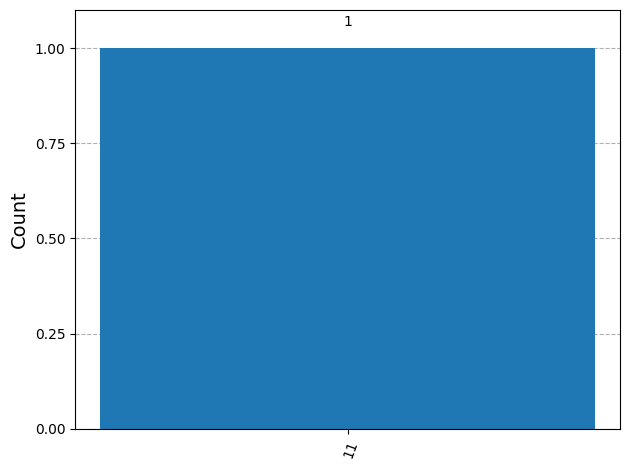

In [23]:
# Step 4: Visualize and analyze results

from qiskit.visualization import plot_histogram

plot_histogram(counts)

#### Since the measurement will collapse the superposition and return only one value, we need to run the circuit at least twice to return both outputs of the function f(0) and f(1). Best case, this performs as well as the classical case, where we compute both f(0) and f(1) in the first two queries. But there's a chance that we'll need to run it more than two times, since the final measurement is probabilistic and might return the same f(x) value the first two times. I would rather have a classical computer in this case.

### Deutsch's algorithm

#### While quantum parallelism alone doesn't give us an advantage over classical computers, we can pair this with another quantum phenomena, interference, to achieve a speed-up. The algorithm now known as "Deutsch's algorithm" is the first example of an algorithm that accomplishes this.

#### In Deutsch's quantum algorithm, though, he found a way to get the information with only one query! He made one adjustment to the "quantum parallelism" circuit above, so that he prepared a superposition state on both qubits, instead of only on qubit 0. Then the two outputs of the function, f(0)f(0) and f(1)f(1) interfered to return 0 if they were either both 0 or both 1 (the function was constant), and returned 1 if they were different (the function was balanced). In this way, Deutsch could differentiate between a constant and a balanced function with a single query.

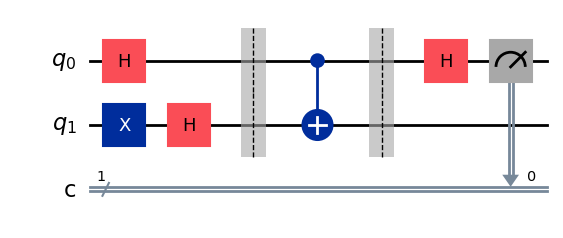

In [24]:
#Step 1 : Map
qc_deutsch = QuantumCircuit(2,1)  # QuantumCircuit(num_qubits, num_classical_bits)

qc_deutsch.x(1)
qc_deutsch.h(range(2))

qc_deutsch.barrier()
qc_deutsch.compose(two_bit_function(2),inplace=True)
qc_deutsch.barrier()

qc_deutsch.h(0)
qc_deutsch.measure(0, 0) # measure(qubit_index, classical_bit_index)     Measure qubit 0 and store the result in classical bit 0

qc_deutsch.draw("mpl")

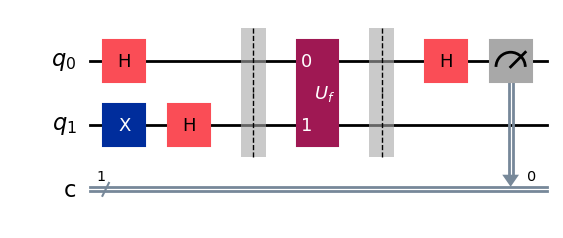

In [32]:
blackbox = two_bit_function(3).to_gate()  # you may edit the number (1-4) inside "twobit_function()" to select among the four valid functions
blackbox.label = "$U_f$"
qc_deutsch = QuantumCircuit(2,1)  # QuantumCircuit(num_qubits, num_classical_bits)

qc_deutsch.x(1)
qc_deutsch.h(range(2))

qc_deutsch.barrier()
qc_deutsch.compose(blackbox,inplace=True)
qc_deutsch.barrier()

qc_deutsch.h(0)
qc_deutsch.measure(0, 0) # measure(qubit_index, classical_bit_index)     Measure qubit 0 and store the result in classical bit 0

qc_deutsch.draw("mpl")

In [25]:
#create Aer backend
backend = AerSimulator()
#create sampler
sampler_sim = BackendSamplerV2(backend = backend)

In [26]:
#Step 3: Execute

job = sampler_sim.run([qc_deutsch],shots=1)
res = job.result()
counts_d = res[0].data.c.get_counts()   #res[0].data.<classical_register_name>.get_counts()

In [ ]:
#Step 4 : Analyze
print(counts_d)
if '1' in counts_d:
    print("Balanced")
else:
    print("constant")


{'1': 1}
Balanced
